# 可视化训练日志-训练过程总体评估指标

训练模型时在`work_dirs`目录生成记录训练日志，解析其中损失函数、评估指标等信息，并可视化。

2025-4-30

## 设置Matplotlib中文字体

In [16]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [2]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [1]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /home/featurize/.cache/matplotlib

import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rc("font",family='SimHei') # 中文字体


--2025-04-28 09:07:21--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
正在连接 172.16.0.13:5848... 已连接。
已发出 Proxy 请求，正在等待回应... 200 OK
长度： 10050868 (9.6M) [application/x-font-ttf]
正在保存至: “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf”

/environment/minico 100%[===================>]   9.58M  19.6MB/s    用时 0.5s    

2025-04-28 09:07:22 (19.6 MB/s) - 已保存 “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf” [10050868/10050868])



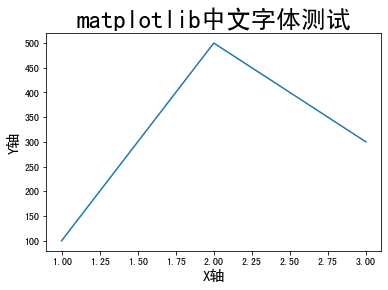

In [2]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

## 进入MMSegmentation主目录

In [3]:
import os
os.chdir('mmsegmentation')

In [4]:
os.getcwd()

'/home/featurize/work/mmsegmentation'

## 导入工具包

In [5]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## 载入训练日志

In [6]:
# 日志文件路径
log_path = './work_dirs/windowdataset-DeepLabV3plus/20250427_180444/vis_data/scalars.json'

In [7]:
with open(log_path, "r") as f:
    json_list = f.readlines()

In [8]:
len(json_list)

600

In [9]:
eval(json_list[4])

{'lr': 0.009972207425604932,
 'data_time': 0.006210756301879883,
 'loss': 0.40513754785060885,
 'decode.loss_ce': 0.2804939478635788,
 'decode.acc_seg': 87.37745666503906,
 'aux.loss_ce': 0.1246436022222042,
 'aux.acc_seg': 85.94093322753906,
 'time': 0.4357243537902832,
 'iter': 500,
 'memory': 10833,
 'step': 500}

In [11]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for each in json_list[:-1]:
    if 'aAcc' in each:
        df_test = df_test.append(eval(each), ignore_index=True)
    else:
        df_train = df_train.append(eval(each), ignore_index=True)

In [12]:
df_train

,lr,data_time,loss,decode.loss_ce,decode.acc_seg,aux.loss_ce,aux.acc_seg,time,iter,memory,step
0,0.009994,0.006166,0.486821,0.341910,86.650848,0.144911,86.301041,0.430948,100.0,14949.0,100.0
1,0.009989,0.006138,0.435891,0.299279,84.245392,0.136612,82.145401,0.434722,200.0,10833.0,200.0
2,0.009983,0.007242,0.419702,0.295945,91.411209,0.123757,91.073898,0.436533,300.0,10833.0,300.0
3,0.009978,0.006623,0.397959,0.286409,78.409386,0.111550,78.309059,0.435977,400.0,10833.0,400.0
4,0.009972,0.006211,0.405138,0.280494,87.377457,0.124644,85.940933,0.435724,500.0,10833.0,500.0
...,...,...,...,...,...,...,...,...,...,...,...
495,0.007189,0.008244,0.193971,0.131028,96.975800,0.062942,95.595642,0.514909,49600.0,10833.0,49600.0
496,0.007183,0.008235,0.270052,0.186343,96.267609,0.083710,95.273880,0.485198,49700.0,10833.0,49700.0
497,0.007178,0.006801,0.244744,0.165635,86.978241,0.079109,86.113358,0.463957,49800.0,10833.0,49800.0
498,0.007172,0.031575,0.228348,0.155798,96.730133,0.072551,93.485260,0.472540,49900.0,10833.0,49900.0


In [13]:
df_test

,aAcc,mIoU,mAcc,mDice,mFscore,mPrecision,mRecall,data_time,time,step
0,93.25,78.76,91.30,87.48,87.48,84.63,91.30,0.004503,0.924944,500.0
1,93.98,80.22,90.89,88.45,88.45,86.43,90.89,0.002403,0.172077,1000.0
2,93.83,80.45,92.88,88.64,88.64,85.54,92.88,0.002318,0.166392,1500.0
3,94.62,81.97,91.91,89.62,89.62,87.69,91.91,0.002336,0.166720,2000.0
4,93.70,79.91,91.97,88.27,88.27,85.47,91.97,0.002539,0.166716,2500.0
...,...,...,...,...,...,...,...,...,...,...
94,95.69,85.09,93.69,91.63,91.63,89.85,93.69,0.002403,0.179474,47500.0
95,95.80,85.42,93.91,91.84,91.84,90.05,93.91,0.003601,0.187420,48000.0
96,96.44,86.91,92.74,92.75,92.75,92.76,92.74,0.002502,0.194003,48500.0
97,96.35,86.82,93.46,92.70,92.70,91.97,93.46,0.002488,0.192437,49000.0


## 导出训练日志表格

In [16]:
df_train.to_csv('图表/训练日志-训练集.csv', index=False)
df_test.to_csv('图表/训练日志-测试集.csv', index=False)

## 可视化辅助函数

In [17]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

## 训练集损失函数

In [18]:
metrics = ['loss', 'decode.loss_ce', 'aux.loss_ce']

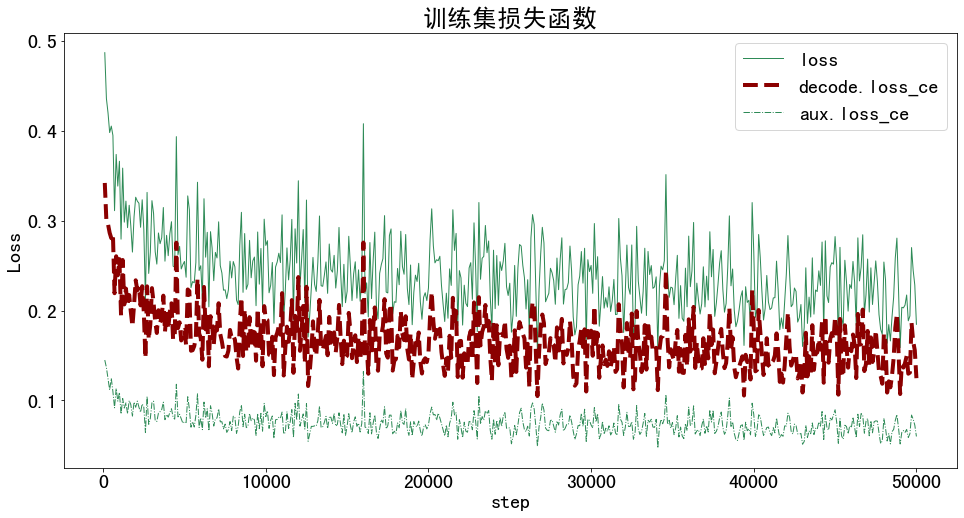

In [19]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    try:
        plt.plot(x, df_train[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.title('训练集损失函数', fontsize=25)

plt.legend(fontsize=20)

plt.savefig('图表/训练集损失函数.pdf', dpi=120, bbox_inches='tight')

plt.show()

## 训练集准确率

In [20]:
metrics = ['decode.acc_seg', 'aux.acc_seg']

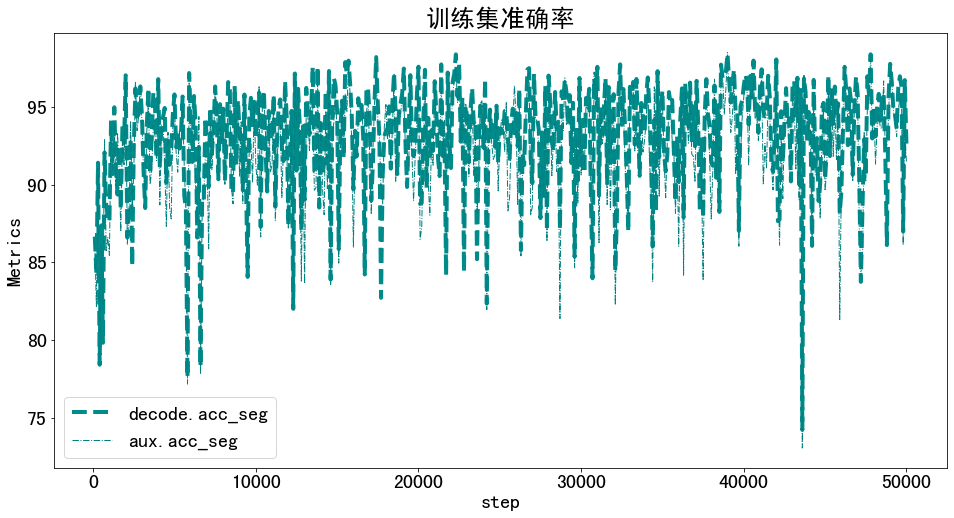

In [21]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    try:
        plt.plot(x, df_train[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('Metrics', fontsize=20)
plt.title('训练集准确率', fontsize=25)

plt.legend(fontsize=20)

plt.savefig('图表/训练集准确率.pdf', dpi=120, bbox_inches='tight')

plt.show()

## 测试集评估指标

In [22]:
df_test.columns

Index(['aAcc', 'mIoU', 'mAcc', 'mDice', 'mFscore', 'mPrecision', 'mRecall',
       'data_time', 'time', 'step'],
      dtype='object')

In [23]:
metrics = ['aAcc', 'mIoU', 'mAcc', 'mDice', 'mFscore', 'mPrecision', 'mRecall']

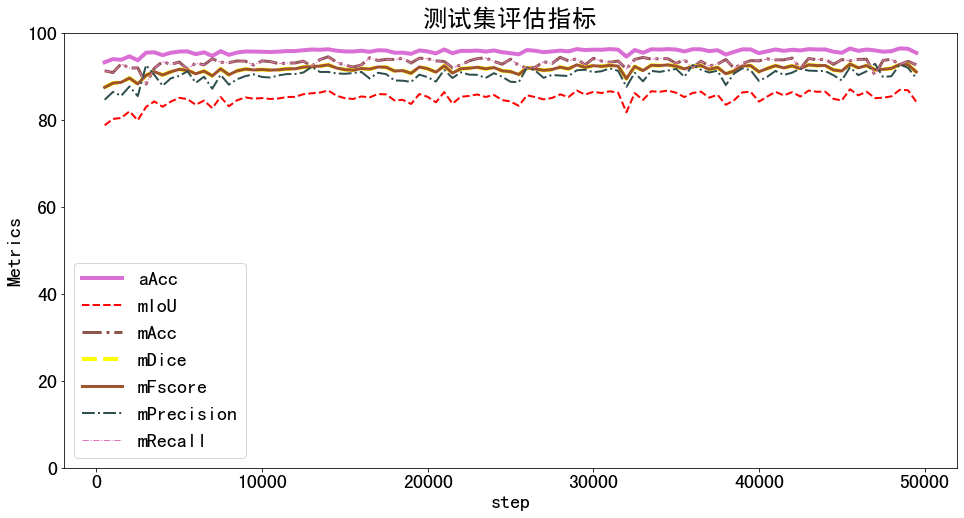

In [24]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    try:
        plt.plot(x, df_test[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.ylim([0, 100])
plt.xlabel('step', fontsize=20)
plt.ylabel('Metrics', fontsize=20)
plt.title('测试集评估指标', fontsize=25)

plt.legend(fontsize=20)

plt.savefig('图表/测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.show()